# Is upper atmos super saturated?

In [1]:
from metpy.calc import relative_humidity_from_mixing_ratio
from metpy.units import units

ng = xr.open_dataset("../data/raw/2018-05-30-NG_5120x2560x34_4km_10s_QOBS_EQX/coarse/3d/all.nc")
ds = xr.open_dataset("../data/processed/training.nc").isel(time=slice(0, 20))

In [2]:
ds.p.attrs['units'] = 'mbar'

In [3]:
args = xr.broadcast(ds.QV, ds.TABS, ds.p)
x = args[0]
rh  =relative_humidity_from_mixing_ratio(*args)
rh = xr.DataArray(rh.to("1"), coords=x.coords, dims=x.dims)

Text(0.5, 0, 'RH')

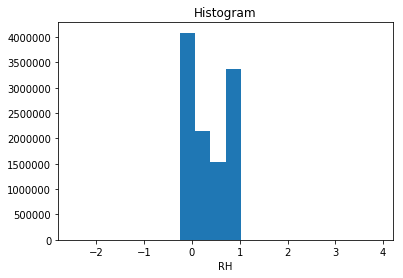

In [4]:
rh.plot.hist(bins=20);
plt.xlabel("RH")

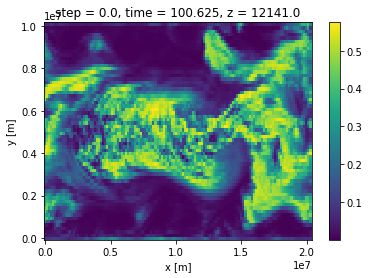

In [5]:
rh[0,0,20].plot()

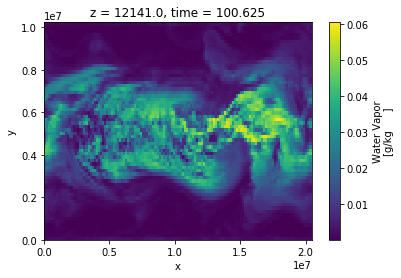

In [6]:
ng.QV[0,20].plot()

Interesting there is no spikes in QV. This means the spikes in QT must be from condensate.

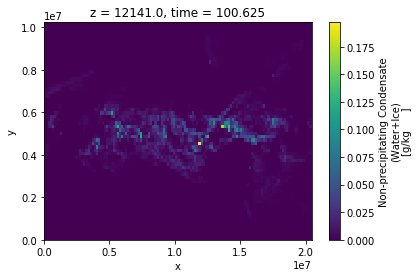

In [7]:
ng.QN[0,20].plot()

Indeed this is the case. I should definitely remove these spiky inputs from the machine learning procedure. I think I should **use QV rather than QT as a prognostic variable.**

Does the relative humidity calculation work with torch? This code gives an error so it doesn't:

```python
def arr_to_pint_torch(x):
    return units.Quantity(torch.tensor(x.values), x.units)

args = [arr_to_pint_torch(x) for x in xr.broadcast(ds.QV, ds.TABS, ds.p)]
rh  =relative_humidity_from_mixing_ratio(*args)
```